<a href="https://colab.research.google.com/github/oweskhan77/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Credit Card Default Prediction Capstone Project 3**


##### **Project Type**    -  ML Classification
##### **Contribution**    - Individual
##### **Name**            - Owes Khan (Cohort Zurich)


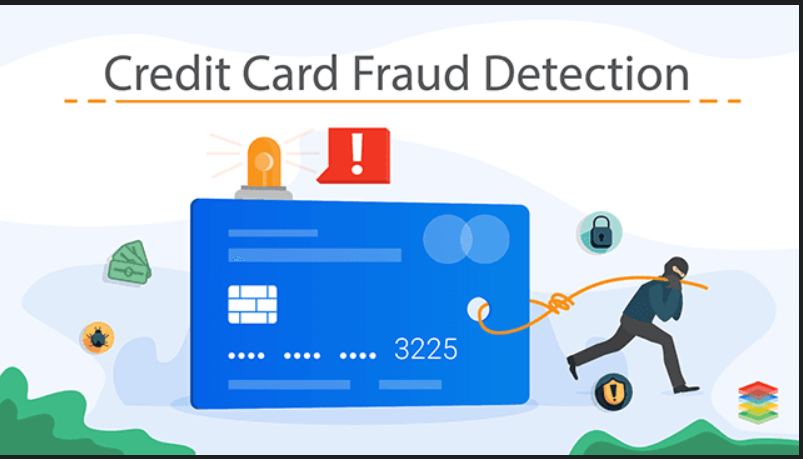

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**  

https://github.com/oweskhan77/Credit-Card-Default-Prediction

# **Problem Statement**



 #### **This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [95]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_roc_curve, plot_confusion_matrix, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

### Dataset Loading

In [96]:
# Load Dataset
data='https://github.com/oweskhan77/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'

In [97]:
pd.read_excel(data)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [98]:
#reading data
df=pd.read_excel(data,header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Dataset First View

In [99]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [100]:
# Dataset last the 5 row
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


### Dataset Rows & Columns count

In [101]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

Our Dataset has 30k rows and 25 columns

### Dataset Information

In [102]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [103]:
# Dataset Duplicate Value Count
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#### Missing Values/Null Values

In [104]:
# Missing Values/Null Values Count
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

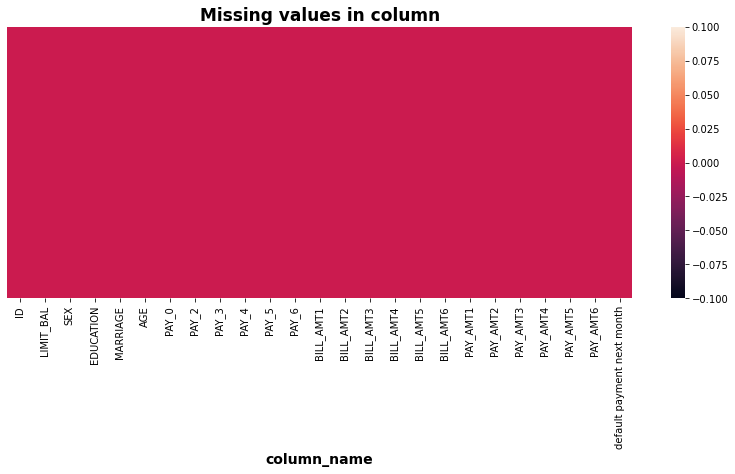

In [105]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

No missing values in our dataset

### What did you know about your dataset?

Answer:- A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

The above dataset has 30000 rows and 25 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [106]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [107]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variables Description 


### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables:
* **ID**: Unique ID of each client
* **LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* **Gender**: 1 = male; 2 = female
* **Education**: 1 = graduate school; 2 = university; 3 = high school; 4 = others
* **Marital status**: 1 = married; 2 = single; 3 = others).
* **Age**: Age in years

 ## **History of past payment.**
 
### We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -2=no consumption, -1 = paid in full ; 0=the use of revolving credit (paid minimum only
),  1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* **PAY_0**: Repayment status in September, 2005

* **PAY_2**: Repayment status in August, 2005

* **PAY_3**: Repayment status in July, 2005

* **PAY_4**: Repayment status in June, 2005

* **PAY_5**: Repayment status in May, 2005

* **PAY_6**: Repayment status in April, 2005 


## **Amount of bill statement (NT dollar).**

* **BILL_AMT1**: Amount of bill statement in September, 2005

* **BILL_AMT2**: Amount of bill statement in August, 2005

* **BILL_AMT3:** Amount of bill statement in July, 2005
* **BILL_AMT4**: Amount of bill statement in June, 2005

* **BILL_AMT5**: Amount of bill statement in May, 2005

* **BILL_AMT6**: Amount of bill statement in April, 2005

## **Amount of previous payment (NT dollar).**

* **PAY_AMT1**: Amount of previous payment in September, 2005

* **PAY_AMT2**: Amount of previous payment in August, 2005

* **PAY_AMT3**: Amount of previous payment in July, 2005
* **PAY_AMT4**: Amount of previous payment in June, 2005
* **PAY_AMT5**: Amount of previous payment in May, 2005

* **PAY_AMT6**: Amount of previous payment in April, 2005

* **default.payment.next.month**: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [108]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Number of unique values in ",i,"is",df[i].nunique(),".")

Number of unique values in  ID is 30000 .
Number of unique values in  LIMIT_BAL is 81 .
Number of unique values in  SEX is 2 .
Number of unique values in  EDUCATION is 7 .
Number of unique values in  MARRIAGE is 4 .
Number of unique values in  AGE is 56 .
Number of unique values in  PAY_0 is 11 .
Number of unique values in  PAY_2 is 11 .
Number of unique values in  PAY_3 is 11 .
Number of unique values in  PAY_4 is 11 .
Number of unique values in  PAY_5 is 10 .
Number of unique values in  PAY_6 is 10 .
Number of unique values in  BILL_AMT1 is 22723 .
Number of unique values in  BILL_AMT2 is 22346 .
Number of unique values in  BILL_AMT3 is 22026 .
Number of unique values in  BILL_AMT4 is 21548 .
Number of unique values in  BILL_AMT5 is 21010 .
Number of unique values in  BILL_AMT6 is 20604 .
Number of unique values in  PAY_AMT1 is 7943 .
Number of unique values in  PAY_AMT2 is 7899 .
Number of unique values in  PAY_AMT3 is 7518 .
Number of unique values in  PAY_AMT4 is 6937 .
Number of 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [109]:
# Write your code to make your dataset analysis ready.
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
#Changing name of some columns for simplicity and better understanding
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
#Dropping ID column because there is no use of ID further.
df.drop('ID',axis=1,inplace=True)

In [110]:
#Creating Copy
df1=df.copy()

In [111]:
#check for columns name
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [112]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'others',5 : 'others',6 : 'others',0 : 'others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'others',0 : 'others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [113]:
#check for replaced labels
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


### What all manipulations have you done and insights you found?

We can renaming dependendent Variable and renaming some feature name for better understanding of feature

maping numerical value to categorical for easy understanding

Gender (1 = male; 2 = female)

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others)



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate Analysis**

#### Chart - 1 **Visualization of Defaulter vs Non-Defaulter**

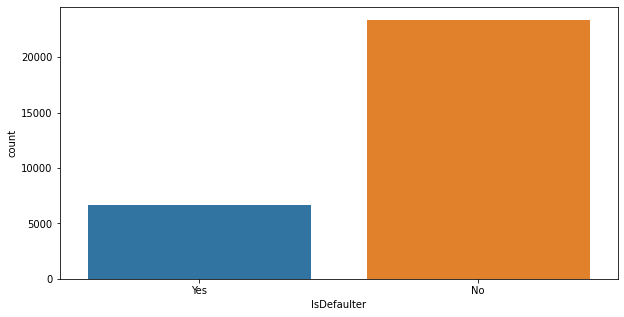

In [114]:
#Visualization of Default(Target Variable) using Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='IsDefaulter',data=df)
plt.show()


##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

**NO=Payment will not default,Yes=Payment will default**

We can see from the graph that number of defaulters is less than Non-Defaulters.And we have an imbalanced dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes Class imbalance can have ill impact on the accuracy of the classification model So it will be necessory for us to treat this problem before putting the data in training.

#### Chart - 2 ***Visualising Ratio of Gender(Male/Female)***

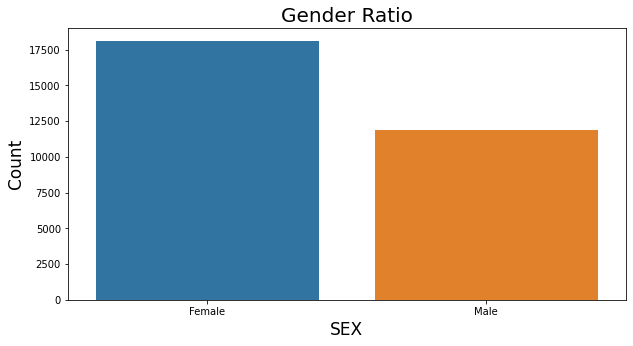

In [115]:
#Using Count plot to check Gender ratio from SEX column in cat_df
plt.figure(figsize=(10,5))
sns.countplot(x='SEX',data=df)
plt.title('Gender Ratio',size=20)
plt.xlabel('SEX',size=17)
plt.ylabel('Count',size=17)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

We can see that Female credit card holder is more than Male.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we can see that Female credit card holder is more than Male so to increase male customers, Bank can give some offers to increase Male customers and at the same time they should take care of their Female customer to increase their business.

#### Chart - 3 ***Visualisation of Credit Card Holder on Their Educational Qualification***

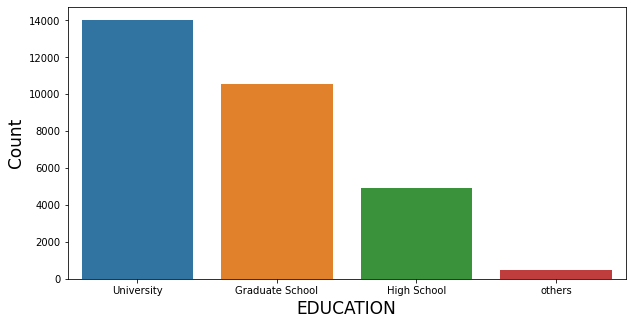

In [116]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='EDUCATION',data=df)
plt.xlabel('EDUCATION',size=17)
plt.ylabel('Count',size=17)
plt.show()


##### 1. Why did you pick the specific chart?

I have used count plot because it is used to show the count of observation of each category using bars.



##### 2. What is/are the insight(s) found from the chart?

Maximum credit card holders are from university followed by graduate school.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see most credit card holders are from University followed by Graduate school so Bank can target these category people to increase their bussiness and as we know source of income for high school candidates are very less so no need to make more focus on this group of people.

#### Chart - 4 ***Visualisation of Credit Card Holder on Their Marital  Status***

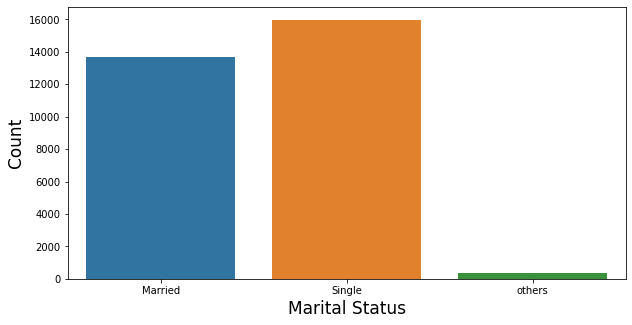

In [117]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='MARRIAGE',data=df)
plt.xlabel('Marital Status',size=17)
plt.ylabel('Count',size=17)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

Maximum Credit Card holders are Single.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Single people make lots of expenditure than married people so they will use credit card more.Hence targetting Single people will surely increase the business.

#### Chart - 5 ***Visualisation of Credit Card Holder on Their age  irrespective of Gender.***

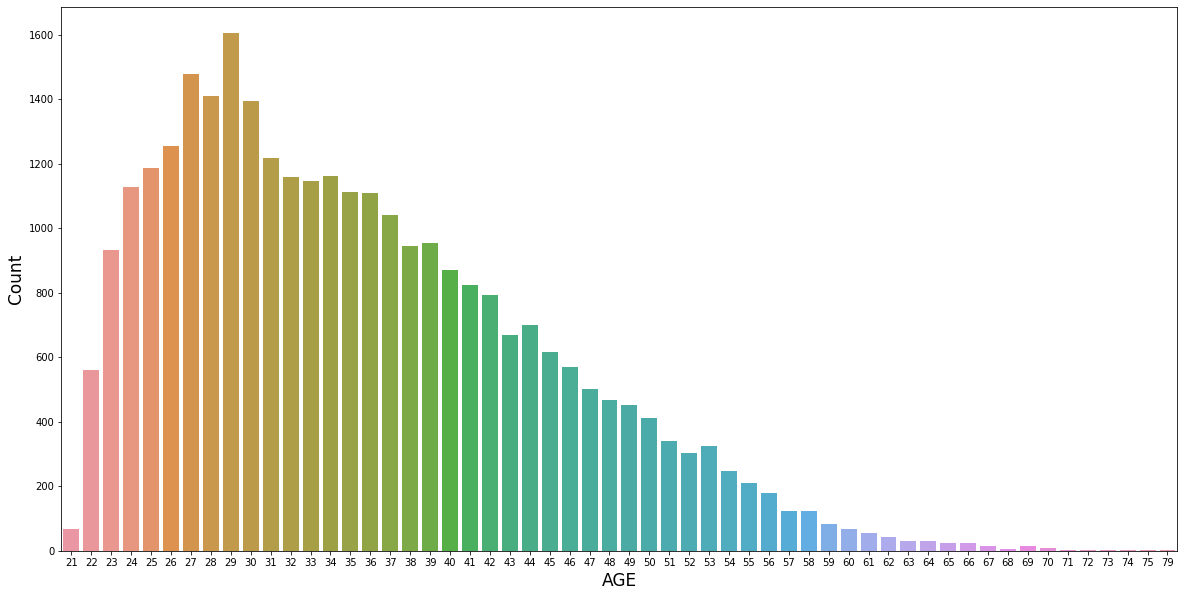

In [118]:
# Chart - 5 visualization code
plt.figure(figsize=(20,10))
sns.countplot(x='AGE',data=df)
plt.xlabel('AGE',size=17)
plt.ylabel('Count',size=17)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

*   We can see that most of the credit card holders age range between 26-30 years.
*   Credit card holders are very less after age of 60 years.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Youngsters are using credit card more so we will mainly focus on them to increase our business.

# **Bivariate Analysis**

#### Chart - 6 ***Limit Balance Vs Defaulter***

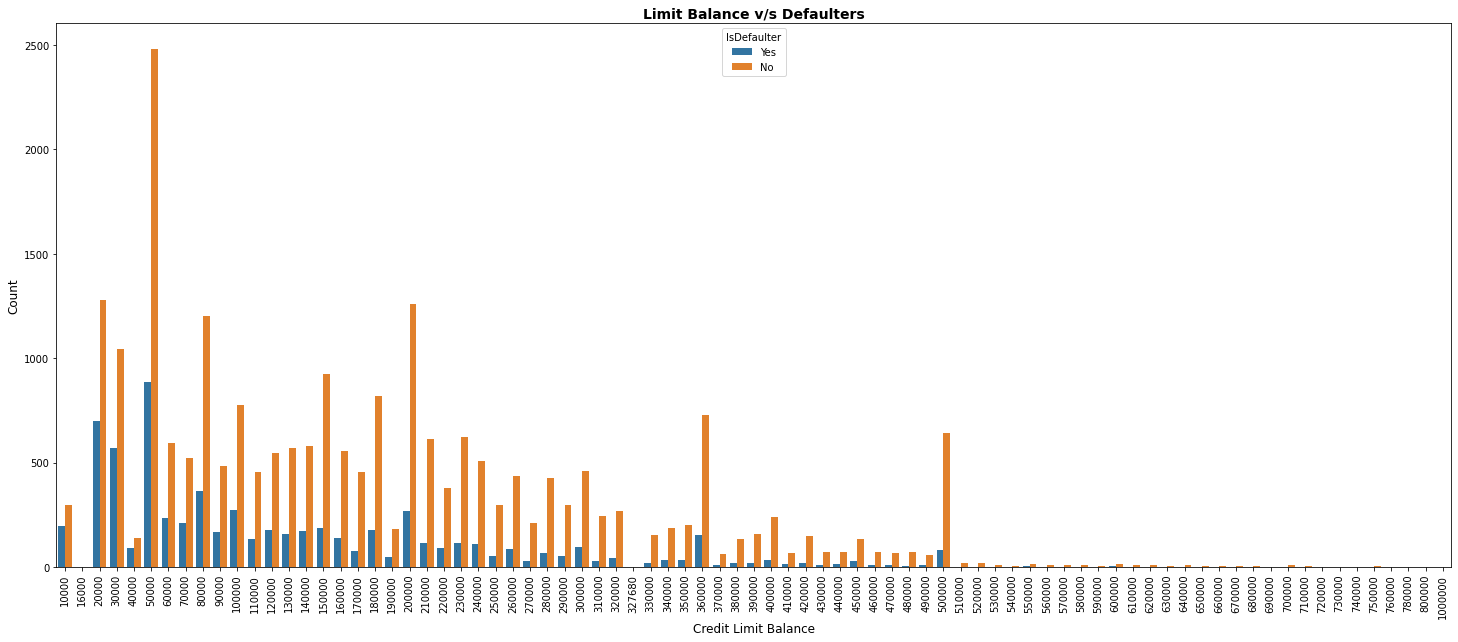

In [119]:
# Chart - 6 visualization code
plt.figure(figsize = (25,10))
sns.countplot(x = 'LIMIT_BAL',hue = 'IsDefaulter',data = df)
plt.xticks(rotation = 90)
plt.title('Limit Balance v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of defaulters are when credit limit balance is 20,000,30,0000 and 50,000.Customers having credit limit balance 50,000 are more likely to default among all others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers with credit limit 50,000 are more likely to default so Bank should charge them in case of default and may also reduce there limit to prevent any kind of loss to the company.

#### Chart - 7  ***SEX Vs Defaulter***

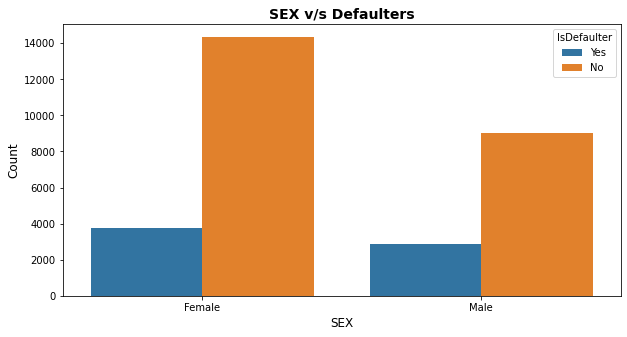

In [120]:
# Chart - 7 visualization code
plt.figure(figsize = (10,5))
sns.countplot(x = 'SEX',hue = 'IsDefaulter',data = df)
plt.title('SEX v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('SEX',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.





##### 2. What is/are the insight(s) found from the chart?

As we know maximum number of credit card holders are Female and from above graph it is also clear that maximum number of defaulters are Female.

In terms of default ratio(default/(default+not_default)),males having more default ratio than females.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bank shall mainly focus on Female customers to increase the bussiness.However some policies should be provided to Male customers also to reduce the chance of being default.

#### Chart - 8  ***Education Vs Defaulter.***

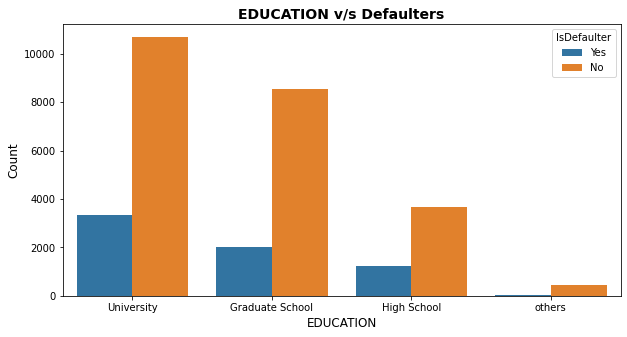

In [121]:
# Chart - 8 visualization code
plt.figure(figsize = (10,5))
sns.countplot(x = 'EDUCATION',hue = 'IsDefaulter',data = df)
plt.title('EDUCATION v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('EDUCATION',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

As maximum number of credit card holder is from unversity and from above graph it is clear that more number of defaulter is also from University only but again in terms of default ratio university people having less default ratio.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can target on University people more to increase our bussiness as most of the credit card holder is from this category.

#### Chart - 9  ***Marriage Vs Defaulter.***

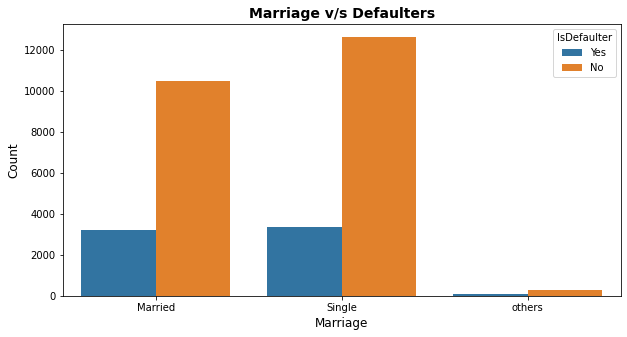

In [122]:
# Chart - 9 visualization code
plt.figure(figsize = (10,5))
sns.countplot(x = 'MARRIAGE',hue = 'IsDefaulter',data = df)
plt.title('Marriage v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Marriage',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

From above we can see that married people having higher default ratio.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Married people having high default ratio than single and as we can see that most of the non-defaulter/maximum credit card holders belongs to Single category so we can mainly focus on them to increase the business.

#### Chart - 10 ***Age Vs Defaulter***

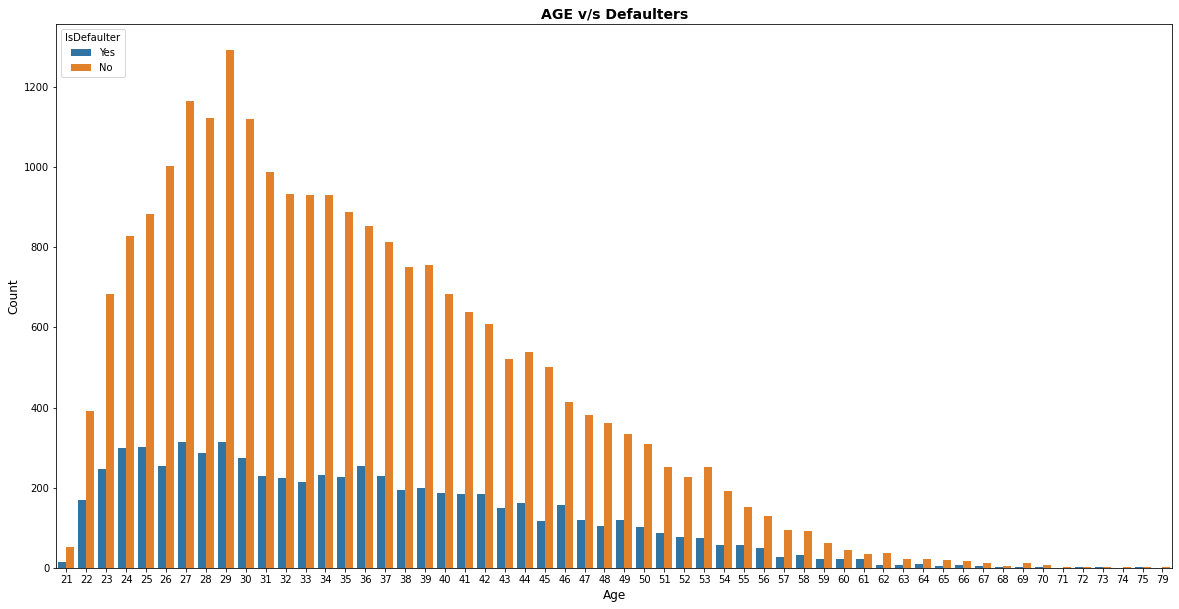

In [123]:
# Chart - 10 visualization 
plt.figure(figsize = (20,10))
sns.countplot(x = 'AGE',hue = 'IsDefaulter',data = df)
plt.title('AGE v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

Most people in our dataset ranges in between 25 and 40 years old.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the more number of defaulters are between the Age of 20 to 25, and greater than 60 years even the customers are less. Proper review has to be done before issueing the credit card. Else it may impact the business growth negatively.

#### Chart - 11 ***Monthly wise repayment Vs Default***


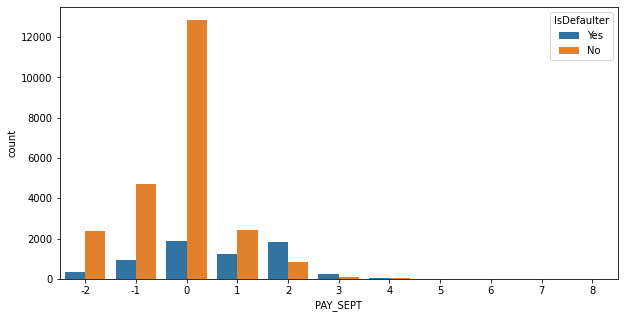

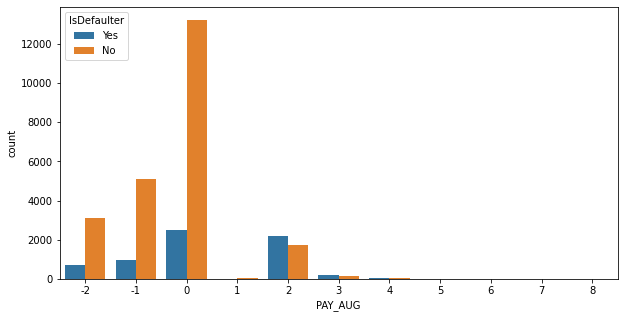

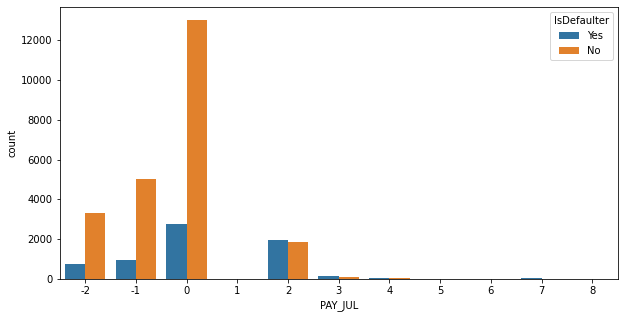

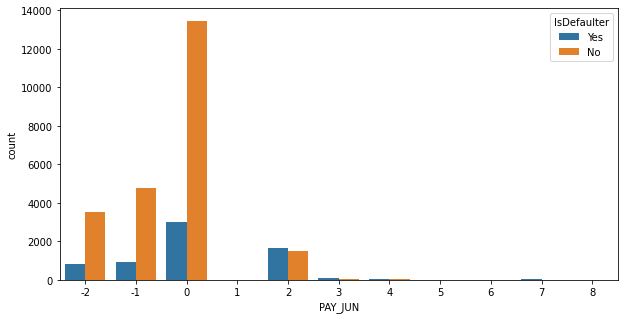

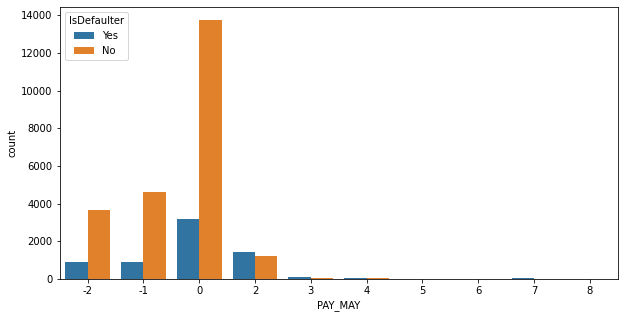

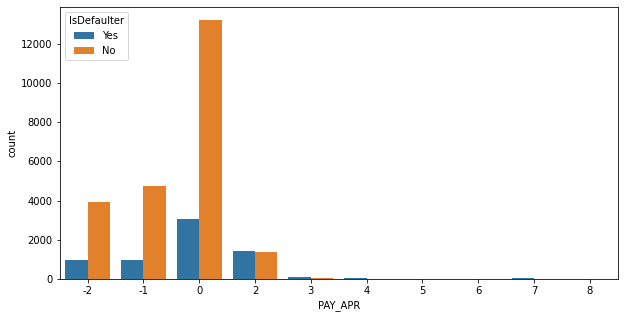

In [124]:
# Chart - 11 visualization code
repay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in repay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

We can see that, cutomers who are paying minimum amount only, having higher chance of being default.Also customers in this category are using credit card mostly.

#### Chart - 12 ***Monthly Billing Amount Vs Default***

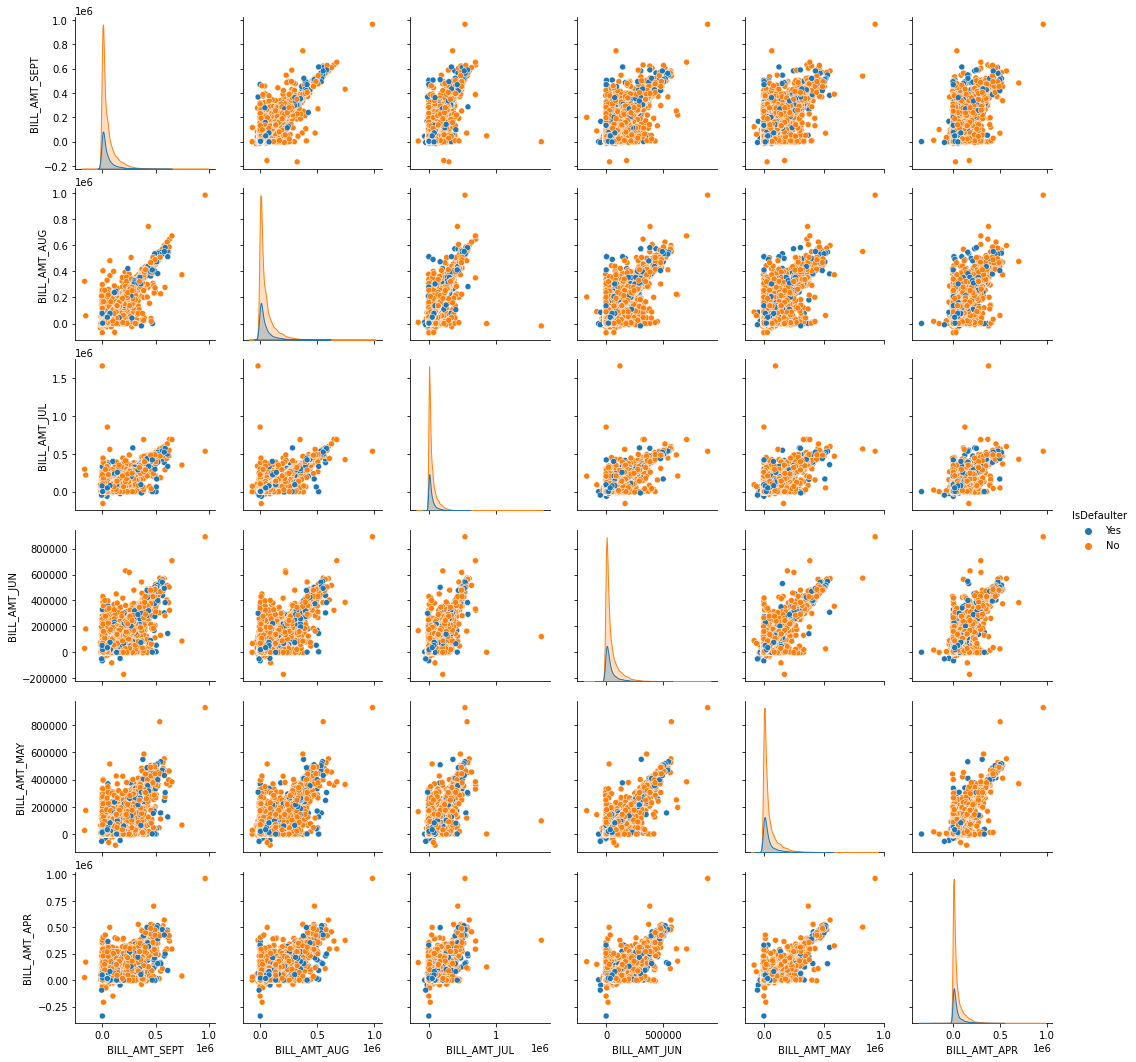

In [125]:
# Chart - 12 visualization code
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR','IsDefaulter']]
sns.pairplot(data = bill_amnt_df,hue='IsDefaulter')

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

##### 2. What is/are the insight(s) found from the chart?

We can see that previous month bill amount is linarly correlated that means users are spending similar amount each month.  with respect to default higher billing amount of previous months may be deafulters in future. 

Answer Here

#### Chart - 14 - Correlation Heatmap

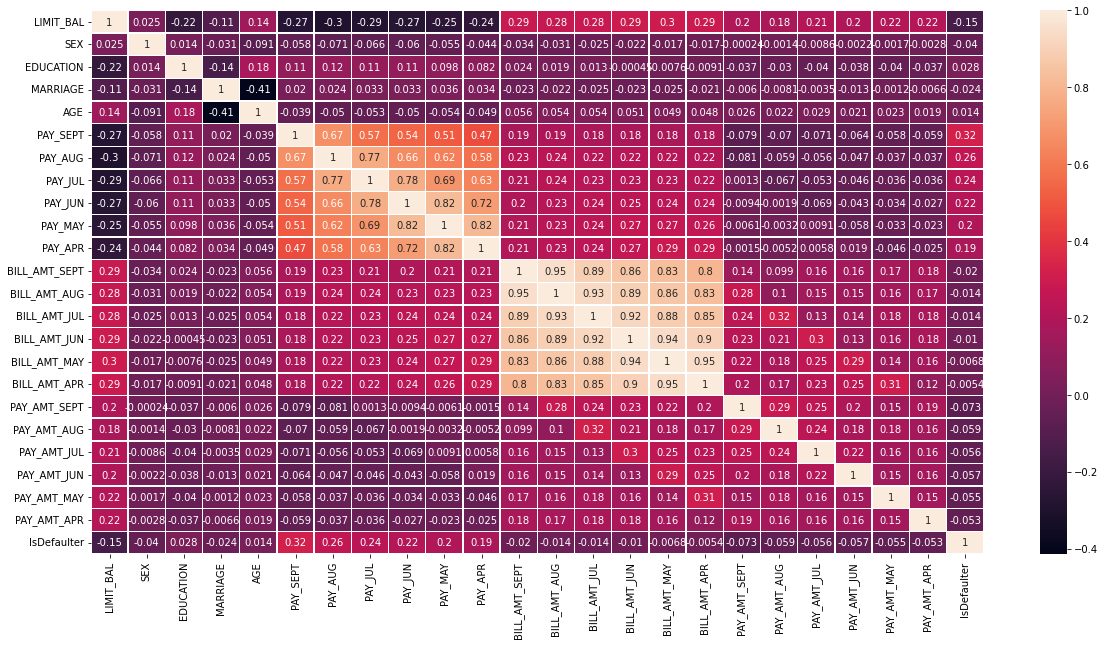

In [126]:
# Correlation Heatmap visualization code
plt.figure (figsize= (20,10))
sns.heatmap(df1.corr(),linewidths=.5,annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. 

Correlation plots are used to understand which variables are related to each other and the strength of this relationship. 

A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. 

The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship. 

##### 2. What is/are the insight(s) found from the chart?

From heatmap it is clear that some of features(eg: PAY_MAY & PAY_APR, BILL_AMT_MAY & BILL_AMT_APR etc) are highly correlated to each other but we are not going to dropp anyone of them because they contains the transation details of customer.

#### Chart - 15 - Pair Plot 

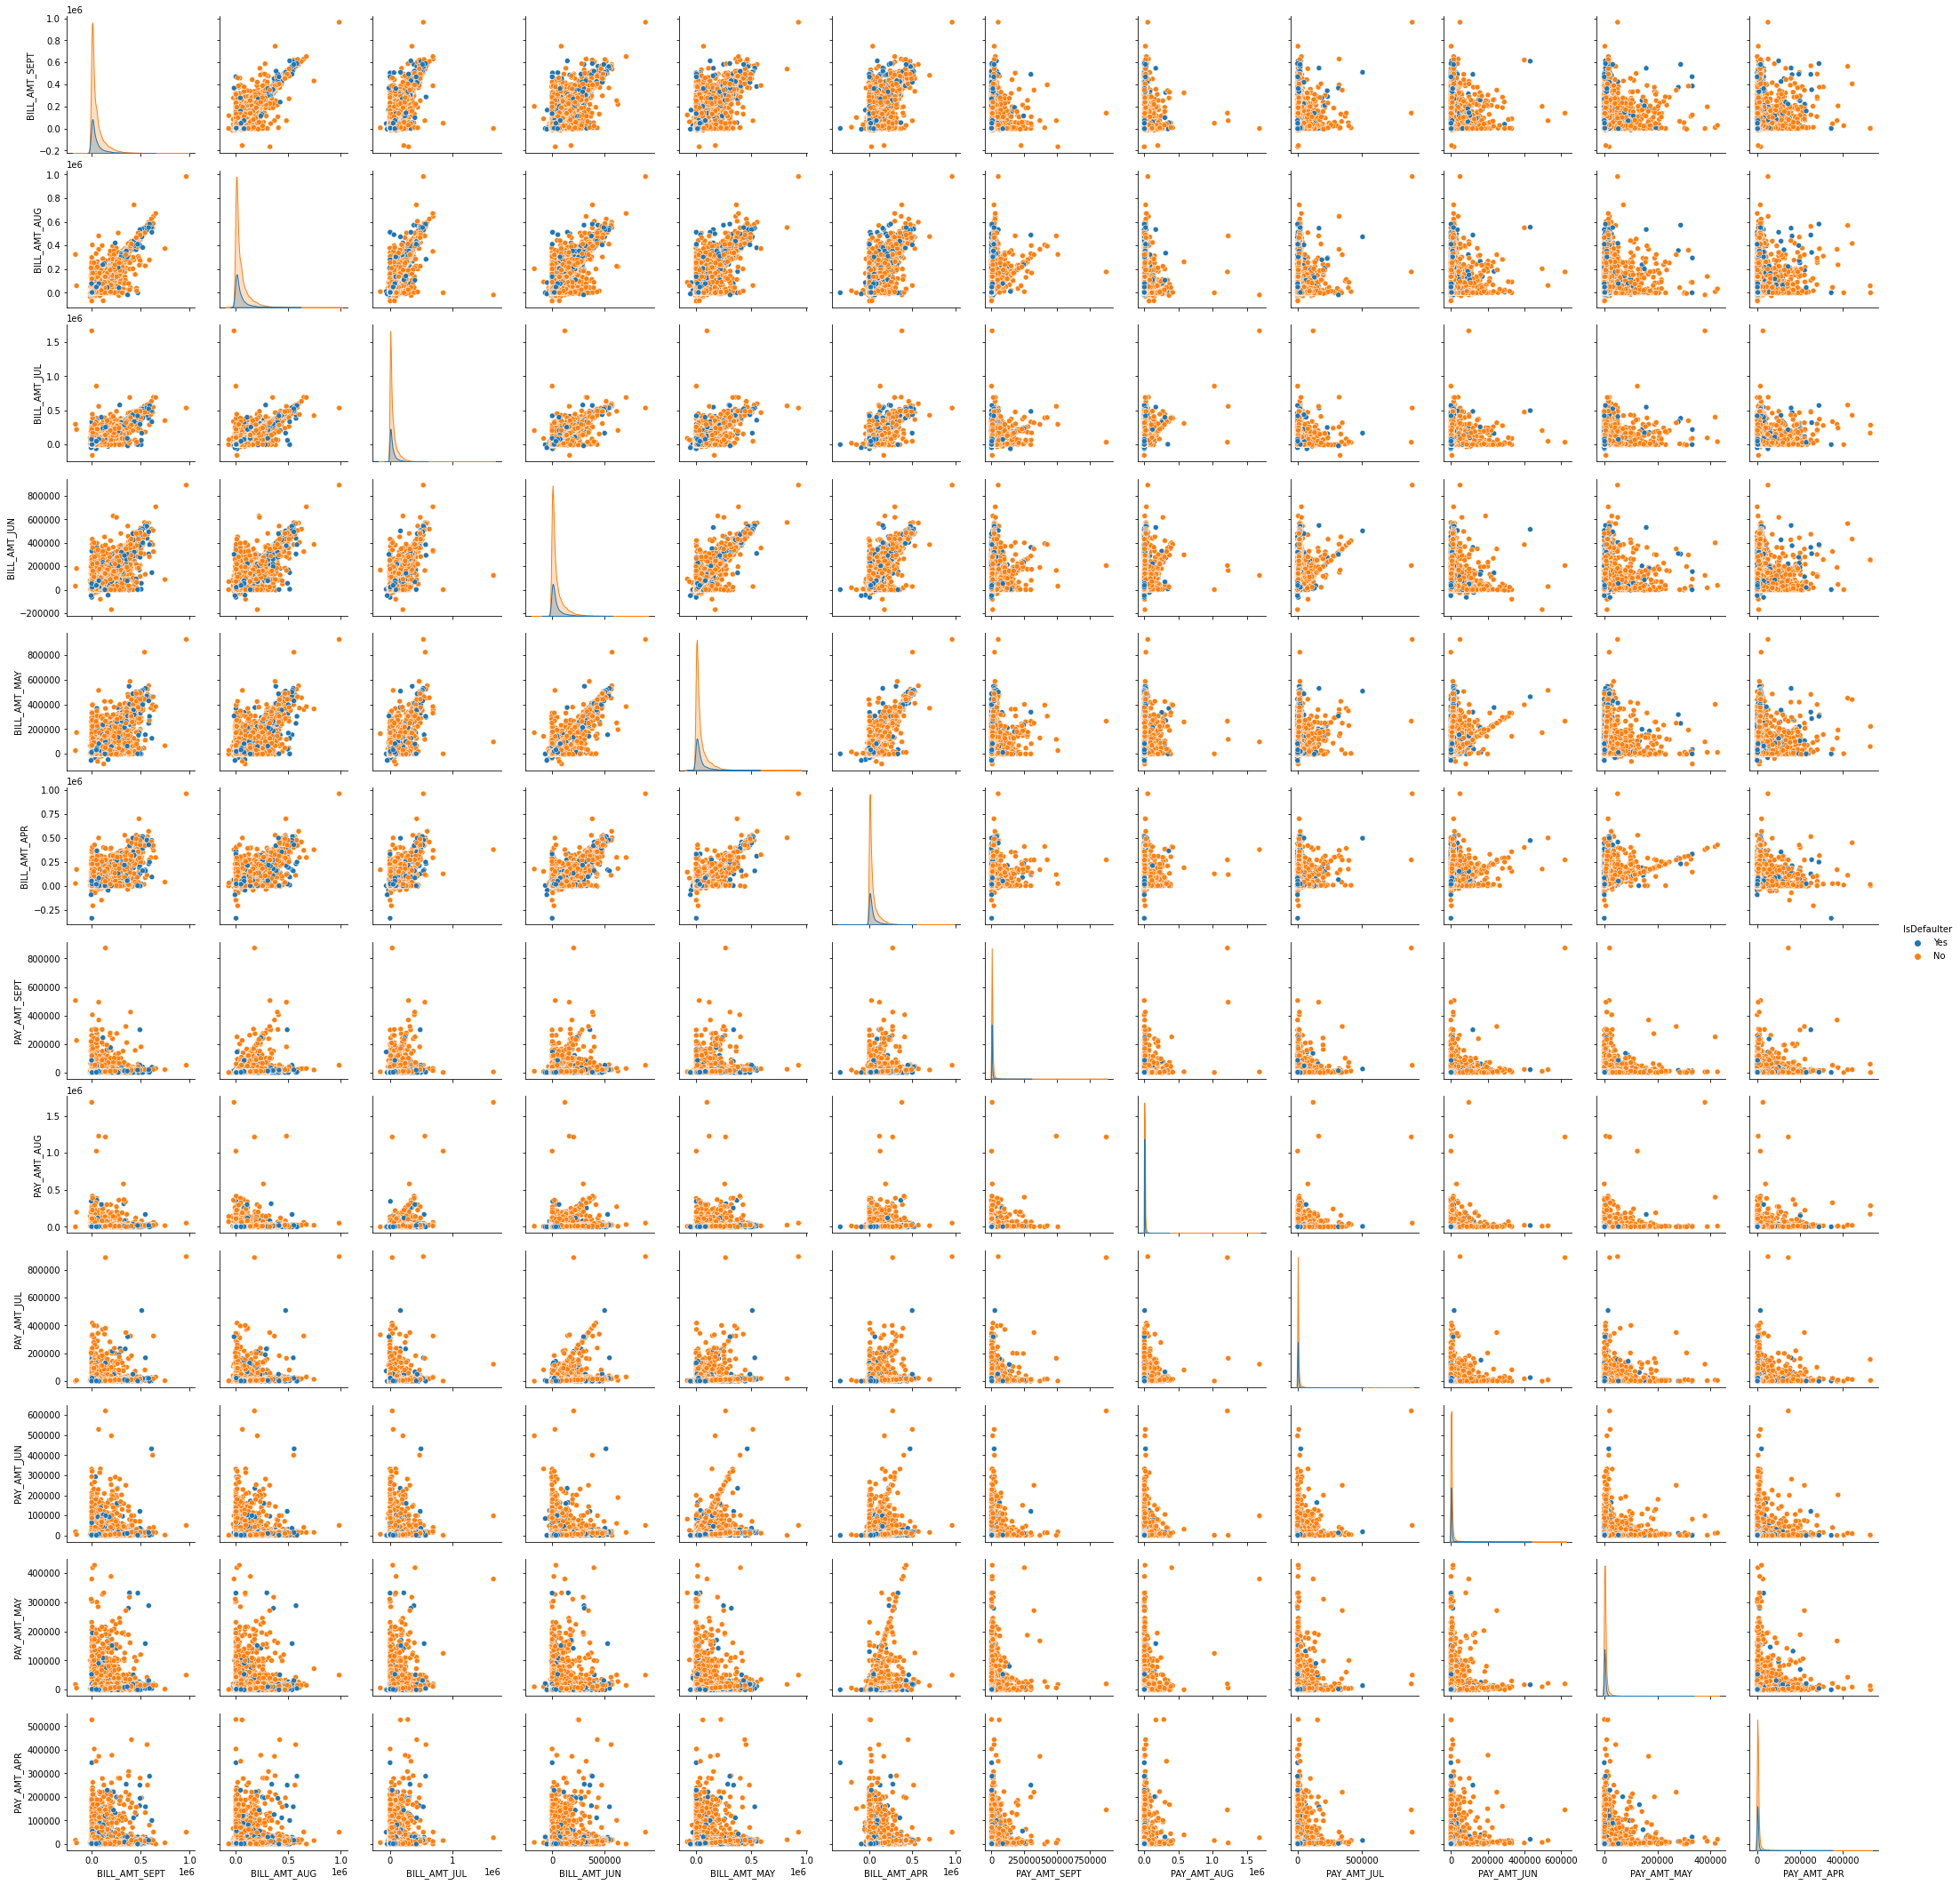

In [94]:
# Pair Plot visualization code
sns.pairplot(df,vars=df.columns[11:-1], kind='scatter',hue= 'IsDefaulter')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the relationship between each and evry feature of bills and payments made.

##### 2. What is/are the insight(s) found from the chart?

Bills kind of follows linear relationship. That means users are spending similar amount each month. where as payment amount is different each month.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: Maritial Status did not have any affect on default payment.

Alternate hypothesis: Maritial Status have affected default payment

#### 2. Perform an appropriate statistical test.

In [127]:
# Perform Statistical Test to obtain P-Value
married_sample = np.array([np.mean(df1[df1["MARRIAGE"]==1].sample(20)["IsDefaulter"].values) for i in range(100)])
single_sample = np.array([np.mean(df1[df1["MARRIAGE"]==2].sample(20)["IsDefaulter"].values) for i in range(100)])

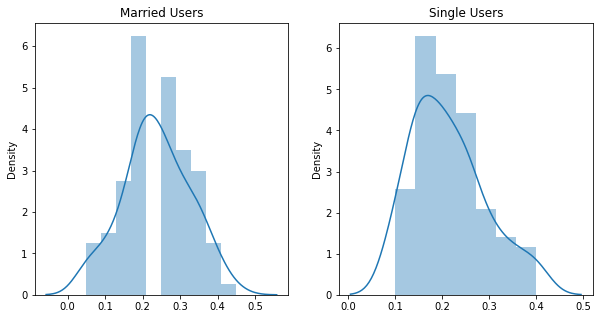

In [128]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(married_sample)
plt.title("Married Users")
plt.subplot(1, 2, 2)
sns.distplot(single_sample)
plt.title("Single Users")
plt.show()

Our samples are normally distributed, we can calculate z score here. Lets keep our significance level at 5%.

In [129]:
effect = np.mean(single_sample) - np.mean(married_sample)
sigma_first = np.std(single_sample)
sigma_third = np.std(married_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(single_sample)  +  (sigma_third**2)/len(married_sample))
z_score = effect / sigma_difference

In [130]:
z_score

-1.9243661707840247

In [131]:
#p-value
import scipy.stats
scipy.stats.norm.sf(abs(z_score))*2

0.05430870168122811

We have obtained p-value to be more that 5%, hence we accept our null hypothesis.

##### Which statistical test have you done to obtain P-Value?

I have used z-score to calculate p-value.

##### Why did you choose the specific statistical test?

Our predictor varaible and Outcome variable is categorical thats why I have choosen this test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Gender did not have any affect on default payment.

Altenate Hypothesis: Gender has affectedd default payment.

#### 2. Perform an appropriate statistical test.

In [132]:
# Perform Statistical Test to obtain P-Value
male_sample = np.array([np.mean(df1[df1["SEX"]==1].sample(20)["IsDefaulter"].values) for i in range(100)])
female_sample = np.array([np.mean(df1[df1["SEX"]==2].sample(20)["IsDefaulter"].values) for i in range(100)])

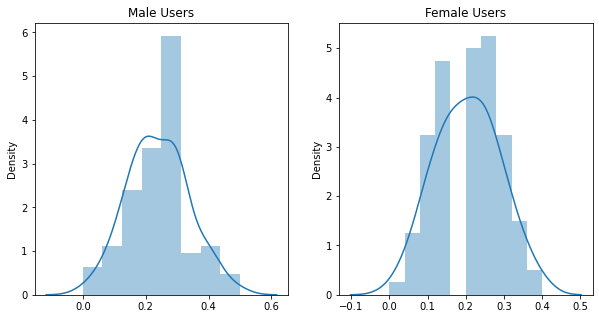

In [133]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(male_sample)
plt.title("Male Users")
plt.subplot(1, 2, 2)
sns.distplot(female_sample)
plt.title("Female Users")
plt.show()

In [134]:
effect = np.mean(female_sample) - np.mean(male_sample)
sigma_first = np.std(female_sample)
sigma_third = np.std(male_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(female_sample)  +  (sigma_third**2)/len(male_sample))
z_score = effect / sigma_difference

In [135]:
z_score

-2.7068014567050356

In [136]:
scipy.stats.norm.sf(abs(z_score))*2

0.006793487269478153

P-value is very less. Hence, we reject our null hypthesis.

##### Which statistical test have you done to obtain P-Value?

I have used z-score to calculate p-value.

##### Why did you choose the specific statistical test?

Our predictor varaible and Outcome variable is categorical thats why I have choosen this test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(HO):**Defaulter does not depends on Educational qualification.

**Alternate Hypothesis(Ha):**Defaulter also get affected by Educational qualification.

**Set signifance level to 5%**.

####2.Perform an appropriate statistical test.

In [137]:
#Creating Contigency table of EDUCATION AND DEFAULT PAYMENT NEXT MONTH
cont_table=pd.crosstab(df1['IsDefaulter'], df1['EDUCATION'], margins=False)
#Using Chi-square test to validate Null/Alternate Hypothesis
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(cont_table)
p

1.2332626245415605e-32

**P value is very less so we can reject Null hypothesis(HO).**

Hence proved defaulter also depends on EDUCATION.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [138]:
# Handling Missing Values & Missing Value Imputation
df1.isnull().sum()


LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
IsDefaulter      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**No missing value is found in our dataset to handle .**

### 2. Handling Outliers

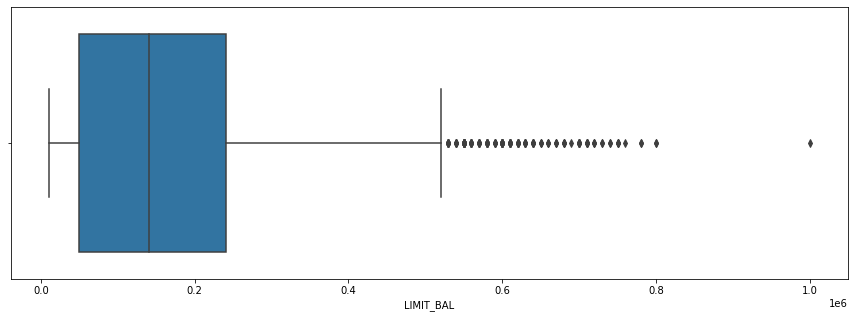

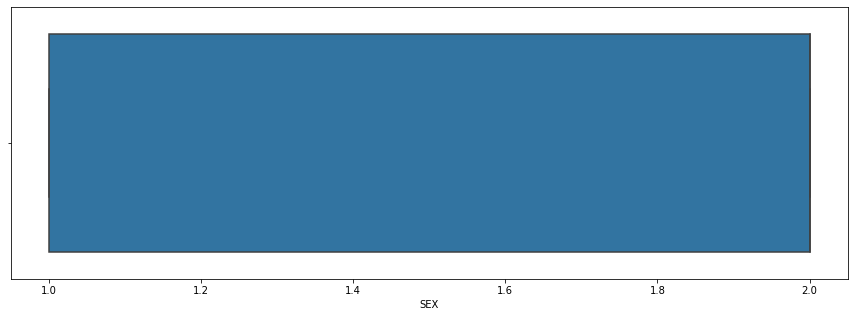

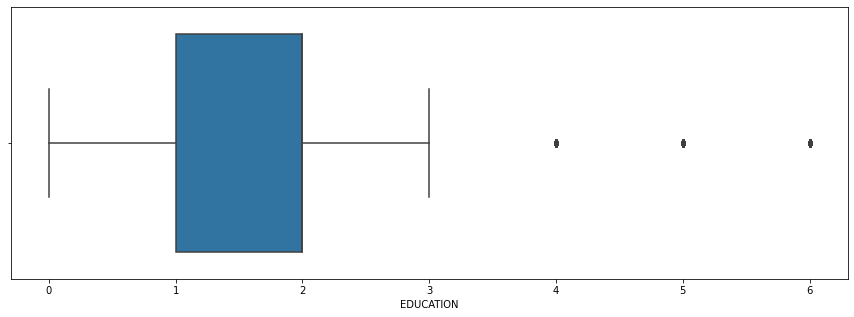

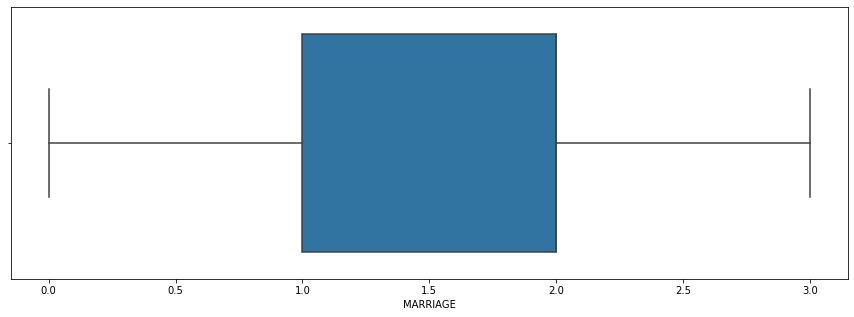

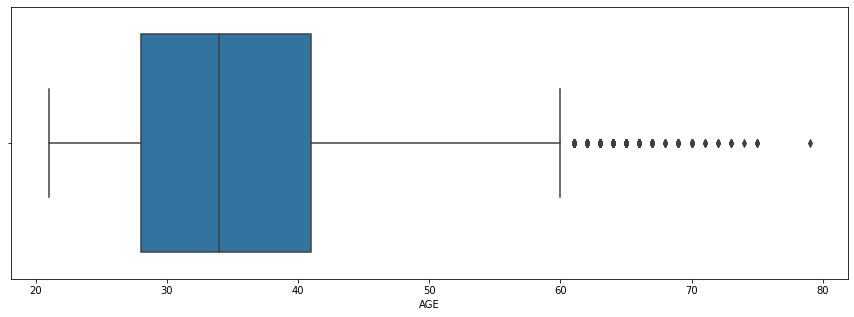

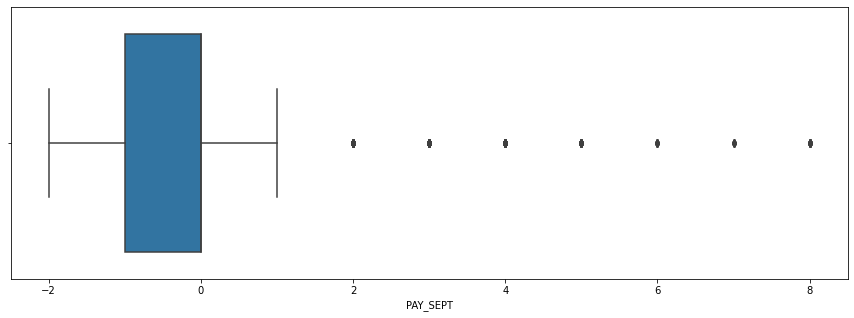

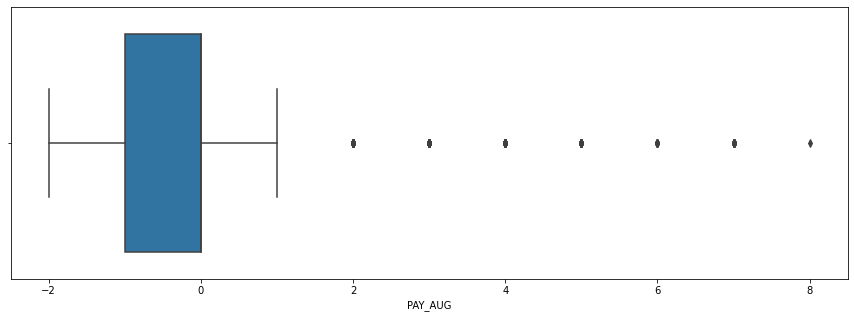

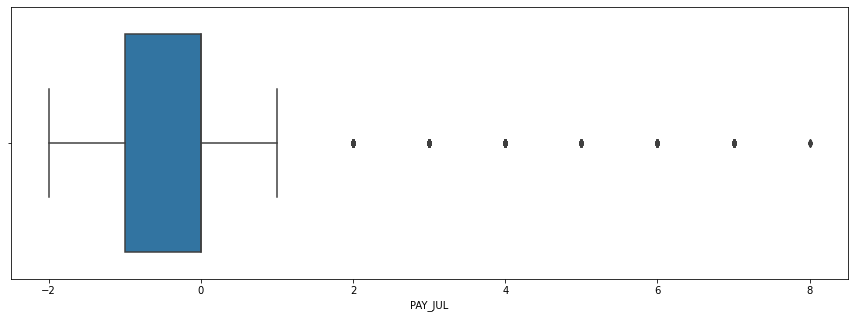

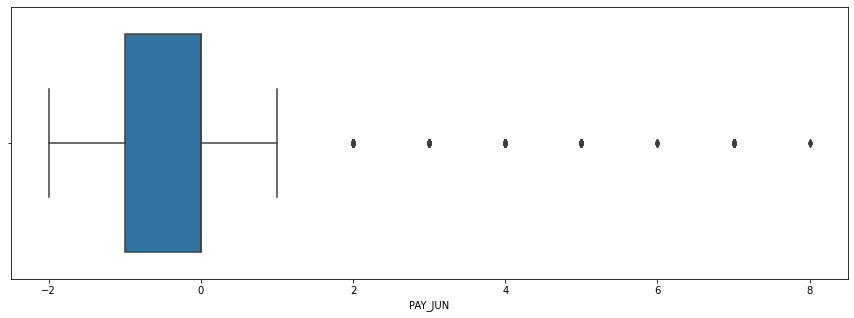

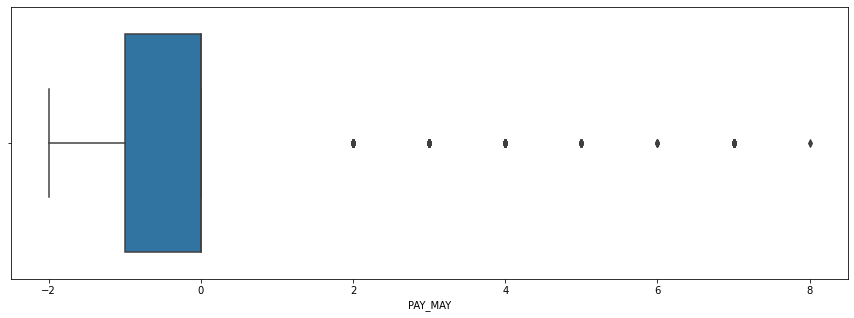

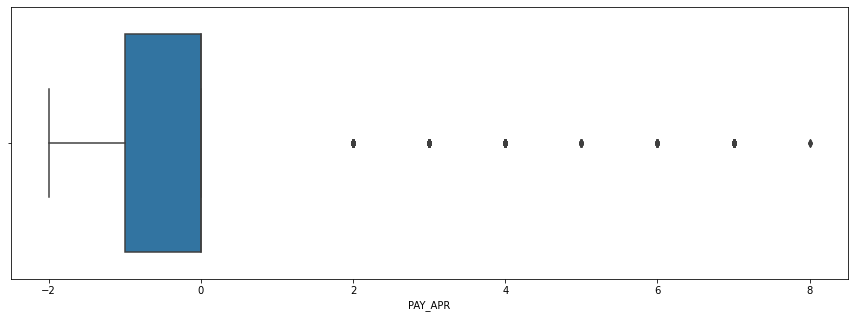

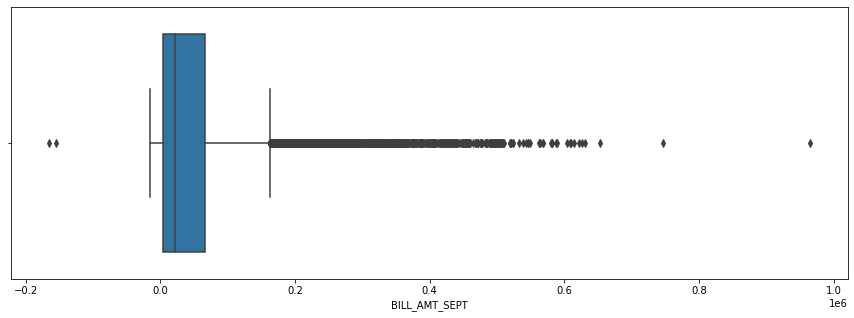

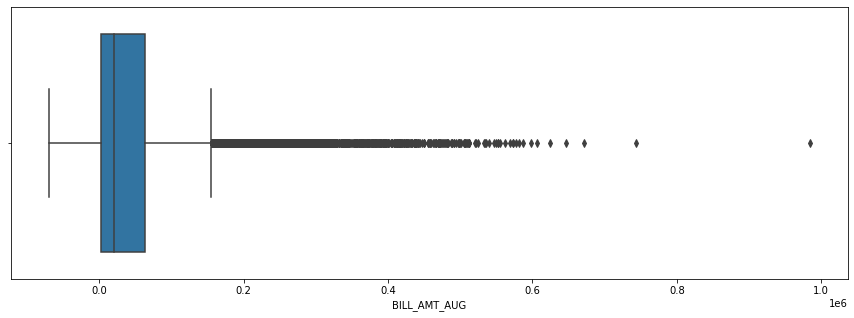

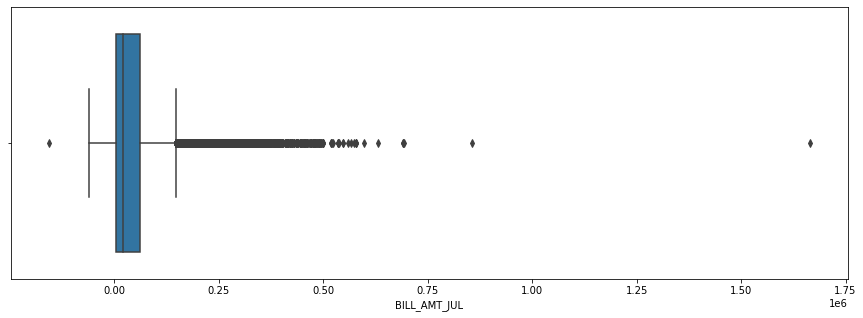

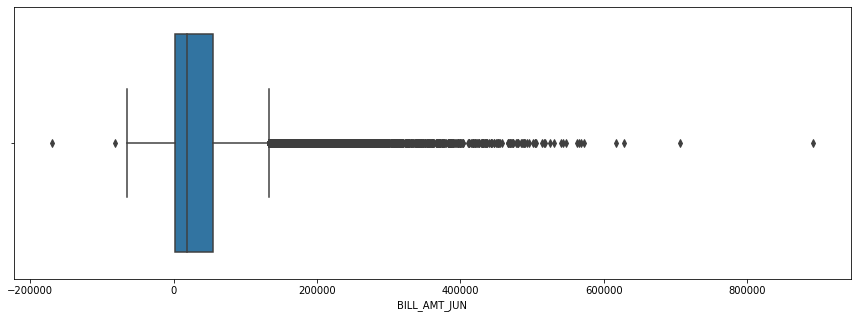

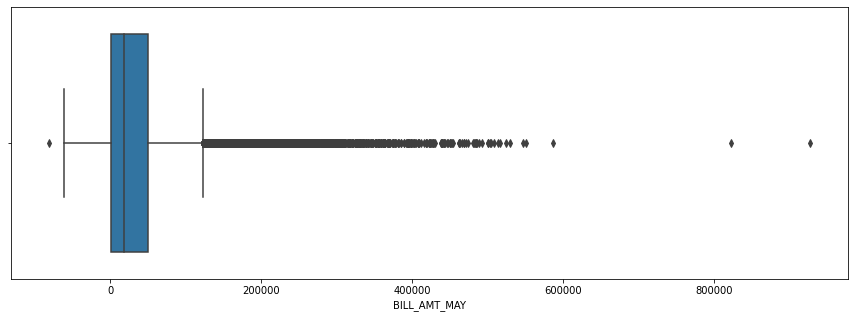

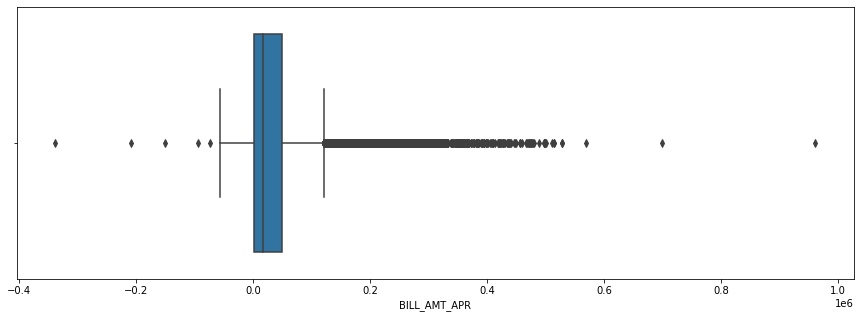

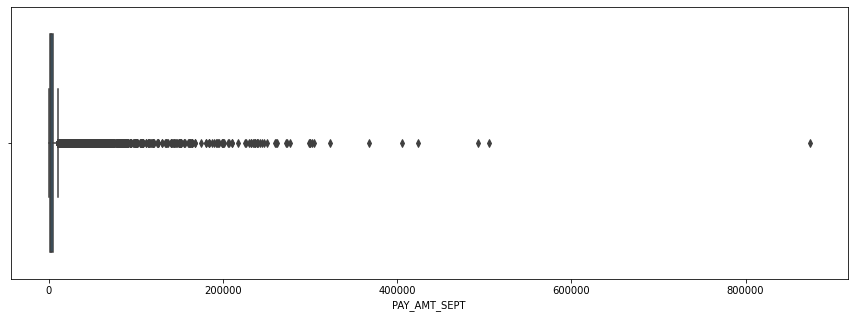

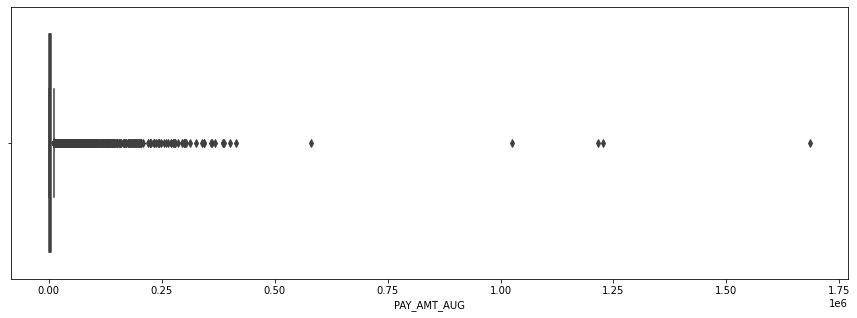

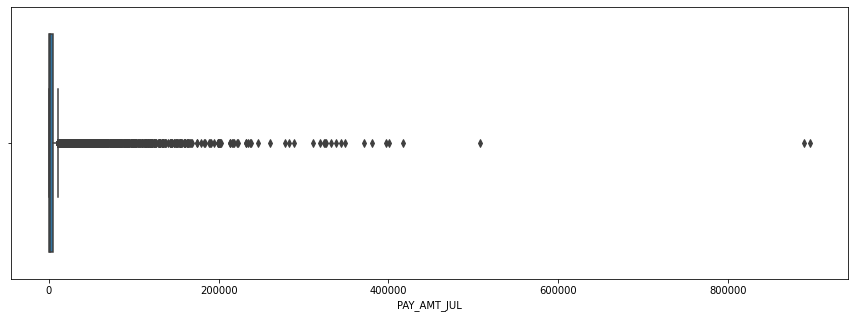

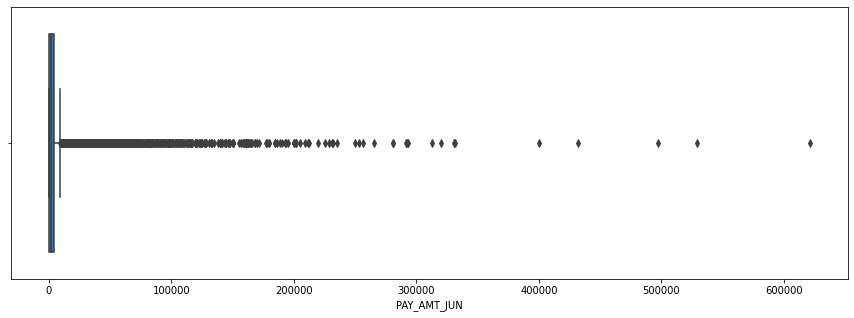

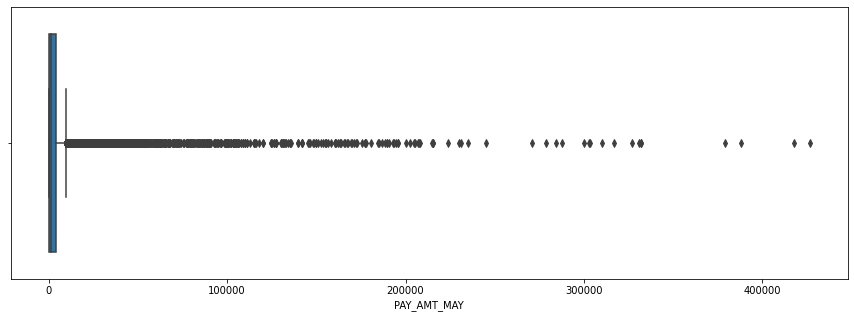

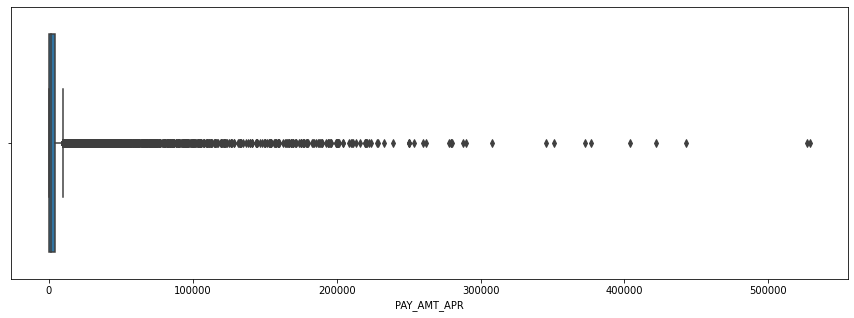

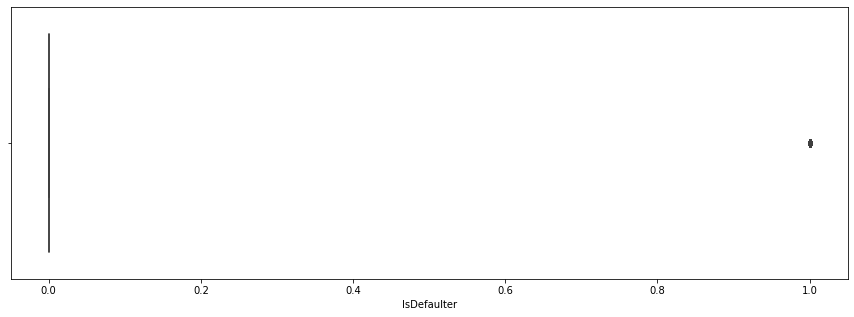

In [139]:
# Handling Outliers & Outlier treatments
#Checking outliers in dataset using Boxplot
for col in df1.columns:
  plt.figure(figsize=(15,5))
  sns.boxplot(df1[col])


##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used boxplot to check outliers in dataset. Some points are lookes like outliers in numeric features which are mainly related to amount and we can use IQR method to treat these outliers but without actually knowing the actual limit of these columns from Bank and treating these outlying amount will result in loss of data.And There might be a chance that the amount which was maximum and lookes like outlier was actual value for that features so because of this i have not used any techniques to treat these outlying values. 

### 3. Categorical Encoding

In [140]:
# Encode your categorical columns
sum(df1.dtypes==object)


0

#### What all categorical encoding techniques have you used & why did you use those techniques?

**There wasn't any categorical values in dataset.**

# **One Hot Encoding**

In [141]:
#Data for Independent variables
X=df1.drop(['IsDefaulter'],axis =1)

In [142]:
X.shape

(30000, 23)

In [143]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [144]:
#maping numerical value to categorical for better Understabding
X['SEX']=X['SEX'].map({1:'Male',0:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [145]:
#Creating Dummies
X=pd.get_dummies(X)

In [146]:
X.head()

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,...,PAY_AMT_MAY,PAY_AMT_APR,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,1,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,0,0,0,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,0,0,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,0,0,0,1,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,1,0,0,0,1,1,0,0


In [147]:
X.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'SEX_Male', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [150]:
#Data for Dependent Variable
Y=df1['IsDefaulter']
Y.shape

(30000,)

### 8. Handling Imbalanced Dataset

In [151]:
#Count of each class in Target variable
df1['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

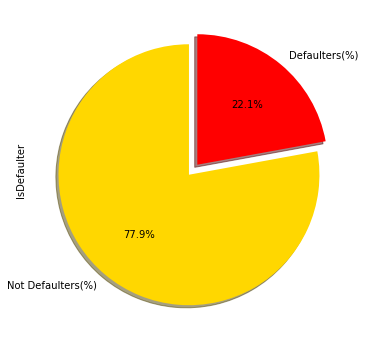

In [160]:
#Visualisation of class imbalance
df1['IsDefaulter'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulters(%)','Defaulters(%)'],
                               colors=['gold','red'],
                               explode=[.05,.05]
                              )
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

As we can see that 77.9% of data belongs to Not defaulters category and only 22.1% belongs to defaulter category so it is clear that our dataset is imbalanced.

In a dataset with highly imbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

The balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

####Handling Imbalanced data with SMOTE

In [161]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', Y.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_smt, Y_smt = smt.fit_resample(X,Y)

print('\nDataset After:\n',Y_smt.value_counts())

Dataset Before:
 0    23364
1     6636
Name: IsDefaulter, dtype: int64

Dataset After:
 1    23364
0    23364
Name: IsDefaulter, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? 

I have used SMOTE (Synthetic Minority Over-sampling technique) for balancing the dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an imbalanced data set. In practice, imbalanced data sets are common and most ML algorithms are highly prone to imbalanced data so we need to improve their performance by using techniques like SMOTE.

SMOTE algorithm works in 4 simple steps:

1)Choose a minority class as the input vector

 2)Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function) 
 
 3)Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor 
 
 4)Repeat the steps until data is balanced

### 9. Data Splitting

In [162]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, Y_train, Y_test = train_test_split(X_smt,Y_smt,test_size = 0.25, random_state=1)
# Show the Training and Testing Data
#Checking the shape of
print(X_train.shape,Y_train.shape)
# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(35046, 28) (35046,)
(11682, 28) (11682,)


##### What data splitting ratio have you used and why? 

---



For the train-test split, I utilised an 75:25 ratio. We can see we have 35046 data for training and 11682 testing which is a fair split to start with as we have kept a good amount of data for training our model.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***